In [1]:
## import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
## read dataset (.data) as CSV 
## put into dataframe
## add headers
## make a copy

heart_dataframe = pd.read_csv('processed.cleveland.data', header=None)

heart_data_1 = heart_dataframe.copy()
heart_data_1.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach',
                      'exang','oldpeak','slope','ca','thal','num']
#heart_data_1.to_csv ('processed.cleveland.data', index=None)

In [3]:
heart_data_1.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [4]:
print('Heart Disease data set dimensions: {}'.format(heart_data_1.shape))

Heart Disease data set dimensions: (303, 14)


14 Attributes used

#3  (age)      
#4  (sex): 1 = male, 0 = female     
#9  (cp): cp: chest pain type
            Value 1: typical angina
            Value 2: atypical angina
            Value 3: non-anginal pain
            Value 4: asymptomatic        
#10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital)  
#12 (chol): serum cholestoral in mg/dl  
#16 (fbs): (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)       
#19 (restecg): restecg: resting electrocardiographic results
                Value 0: normal
                Value 1: having ST-T wave abnormality 
                          (T wave inversions and/or ST elevation or depression of > 0.05 mV)
                Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria)   
#32 (thalach): 32 thalach: maximum heart rate achieved   
#38 (exang): exercise induced angina (1 = yes; 0 = no)     
#40 (oldpeak): ST depression induced by exercise relative to rest   
#41 (slope): the slope of the peak exercise ST segment
            Value 1: upsloping
            Value 2: flat
            Value 3: downsloping      
#44 (ca): number of major vessels (0-3) colored by flourosopy        
#51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect       
#58 (num): diagnosis of heart disease (angiographic disease status)  (the predicted attribute)
            Value 0: < 50% diameter narrowing
            Value 1: > 50% diameter narrowing
        (in any major vessel: attributes 59 through 68 are vessels)
        
      
    
    

In [5]:
#create a new column called 'num_2', replace 2, 3, 4 with 1
heart_data_1.loc[:,'num_2'] = '0'
heart_data_1['num_2'] = heart_data_1['num']

heart_data_1['num_2'] = heart_data_1['num_2'].replace([2, 3, 4], 1)
heart_data_1['ca'] = heart_data_1['num_2'].replace([2, 3, 4], 1)
heart_data_1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,num_2
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,1,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,1,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,1,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,1,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1,3.0,1,1


In [6]:
for col in heart_data_1.columns:
    print(heart_data_1[heart_data_1[col]=='?'])

Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, num, num_2]
Index: []
Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, num, num_2]
Index: []
Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, num, num_2]
Index: []
Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, num, num_2]
Index: []
Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, num, num_2]
Index: []
Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, num, num_2]
Index: []
Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, num, num_2]
Index: []
Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, r

In [7]:
#Remove a row containing a missing data (166, 192, 287, 87, 266, and 302)
heart_data_1 = heart_data_1.drop([166, 192, 287, 87, 266, 302])

In [8]:
heart_data_1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,num_2
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,1,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,1,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,1,7.0,1,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,1,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,1,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1,7.0,3,1


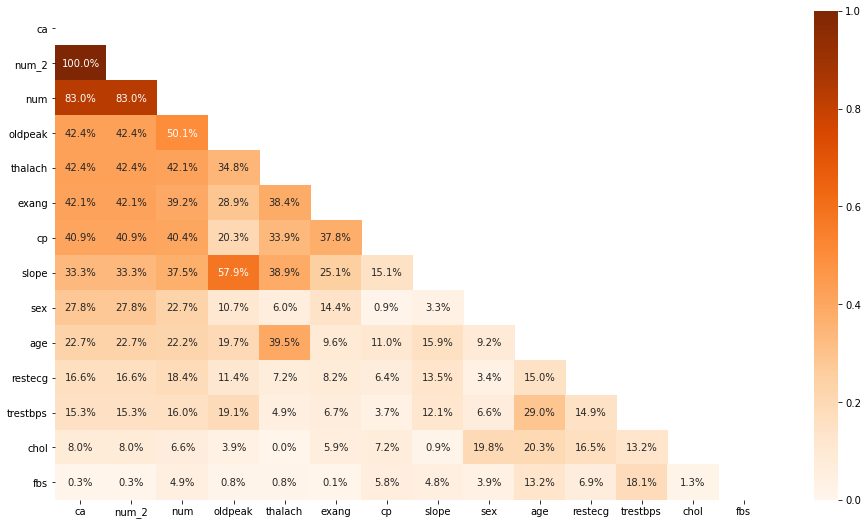

In [9]:
#Creating a Correlation Heat Map
corr = abs(heart_data_1.corr())
corr_sorted = corr[['num_2']].sort_values(by='num_2', ascending=False)
corr_matrix = corr.loc[corr_sorted.index][corr_sorted.index]
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))

plt.figure(figsize=(16,9))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='Oranges', fmt = '.1%', vmin=0, vmax=1, mask=mask)

In [14]:
X = heart_data_1.iloc[:, 0:13]
Y = heart_data_1.iloc[:, 14]
print(Y)

0      0
1      1
2      1
3      0
4      0
      ..
297    1
298    1
299    1
300    1
301    1
Name: num_2, Length: 297, dtype: int64

In [12]:
# Before doing any data visualizations, I need to do a train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)
heart = X_train.copy()
# Sanity check
print(len(heart['age']))
print(len(heart_data_1['age']))

222
297


In [13]:
# Data, visualization, feature scaling, data cleaning
# are there missing values?
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
num_pipeline = Pipeline([
  ('std_scaler', StandardScaler())
])
cat_attribs = ['sex', 'cp', 'fbs', 'exang', 'slope', 'ca', 'thal']
num_attribs = ['age', 'trestbps', 'chol', 'restecg', 'thalach', 'oldpeak']
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])
heart_prepared = full_pipeline.fit_transform(heart)

In [15]:
# fit X, Y_train into SVM
from sklearn.svm import SVC
class_sv = SVC(kernel = 'linear', random_state = 0)
class_sv.fit(X_train, Y_train)

SVC(kernel='linear', random_state=0)

In [16]:
# fit X, Y_train into Kernel SVM
from sklearn.svm import SVC
class_ksv = SVC(kernel = 'rbf', random_state = 0)
class_ksv.fit(X_train, Y_train)

SVC(random_state=0)

In [17]:
# fit X, Y_train into GaussianNB method of naive_bayes class
from sklearn.naive_bayes import GaussianNB
class_gnb = GaussianNB()
class_gnb.fit(X_train, Y_train)

GaussianNB()

In [18]:
#fit X, Y_train into Logistic Regression
from sklearn.linear_model import LogisticRegression

class_ls = LogisticRegression(random_state = 0)
class_ls.fit(X_train, Y_train)

/Users/thanapat/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [19]:
#ROC curves and confusion matrices
from sklearn.model_selection import cross_val_predict
y_train_pred_sv = cross_val_predict(class_sv, X_train, Y_train, cv=3)
y_train_pred_ksv = cross_val_predict(class_ksv, X_train, Y_train, cv=3)
y_train_pred_gnb = cross_val_predict(class_gnb, X_train, Y_train, cv=3)
y_train_pred_ls = cross_val_predict(class_ls, X_train, Y_train, cv=3)

from sklearn.metrics import confusion_matrix

print("Support Vector Machine:")
print(confusion_matrix(Y_train, y_train_pred_sv))

print("Kernel SVM:")
print(confusion_matrix(Y_train, y_train_pred_ksv))

print("Naive Bayes:")
print(confusion_matrix(Y_train, y_train_pred_gnb))

print("Logistic Regression:")
print(confusion_matrix(Y_train, y_train_pred_ls))

Support Vector Machine:
[[118   0]
 [  0 104]]
Kernel SVM:
[[91 27]
 [58 46]]
Naive Bayes:
[[118   0]
 [  0 104]]
Logistic Regression:
[[118   0]
 [  1 103]]


/Users/thanapat/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/thanapat/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Support Vector Machine


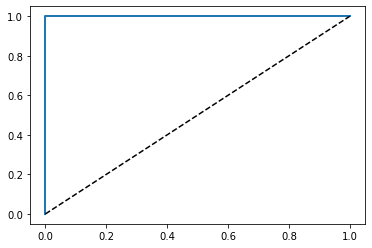

1.0

Kernel SVM


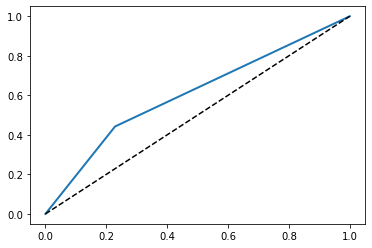

0.6067470664928291

Naive Bayes


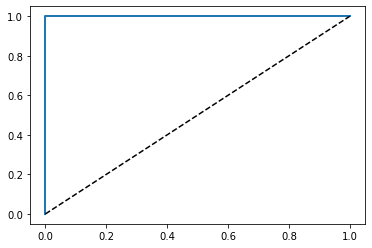

1.0

Logistic Regression


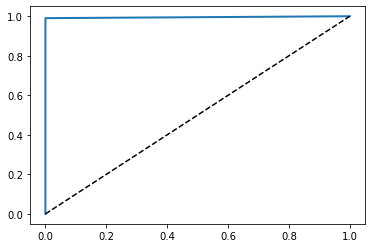

0.9951923076923077


In [20]:
# ROC curves for SVM, KSVM, NB, Logistic Regression
from sklearn.metrics import roc_auc_score, roc_curve
fpr_sv, tpr_sv, thresholds_sv = roc_curve(Y_train, y_train_pred_sv)
fpr_ksv, tpr_ksv, thresholds_ksv = roc_curve(Y_train, y_train_pred_ksv)
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(Y_train, y_train_pred_gnb)
fpr_ls, tpr_ls, thresholds_ls = roc_curve(Y_train, y_train_pred_ls)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth = 2, label=label)
    plt.plot([0,1], [0,1], 'k--')

print("Support Vector Machine")
plot_roc_curve(fpr_sv, tpr_sv)
plt.show()
print(roc_auc_score(Y_train, y_train_pred_sv))
print()
print("Kernel SVM")
plot_roc_curve(fpr_ksv, tpr_ksv)
plt.show()
print(roc_auc_score(Y_train, y_train_pred_ksv))
print()
print("Naive Bayes")
plot_roc_curve(fpr_gnb, tpr_gnb)
plt.show()
print(roc_auc_score(Y_train, y_train_pred_gnb))
print()
print("Logistic Regression")
plot_roc_curve(fpr_ls, tpr_ls)
plt.show()
print(roc_auc_score(Y_train, y_train_pred_ls))